# AD Modelling Pipeline

putting it all together pray to god it works

In [101]:
import pickle
import numpy as np
import pandas as pd
# import whobpyt

import matplotlib.pyplot as plt 

In [4]:
num_windows = 9    # arbitrary I think

In [69]:
# Load the models from the file
with open('model/CN_abt_model.pkl', 'rb') as f:
    cn_model = pickle.load(f)

with open('model/MCI_abt_model.pkl', 'rb') as f:
    mci_model = pickle.load(f)

with open('model/AD_abt_model.pkl', 'rb') as f:
    ad_model = pickle.load(f)

whole_brain_models = [cn_model, mci_model, ad_model]

with open('../predictors/gbregressor_ventricular_icv.pkl', 'rb') as f:
    predictor = pickle.load(f)

/Users/dyutichakraborty/Documents/ad_modelling_fyp/venv/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DummyRegressor from version 1.4.1.post1 when using version 1.5.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/dyutichakraborty/Documents/ad_modelling_fyp/venv/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.4.1.post1 when using version 1.5.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/dyutichakraborty/Documents/ad_modelling_fyp/venv/lib/python3.11/site-packages/sklearn/base.py:376:

In [66]:
ts_sim, fc_sim = cn_model.simulate(u =0, num_windows=num_windows, base_window_num=20)

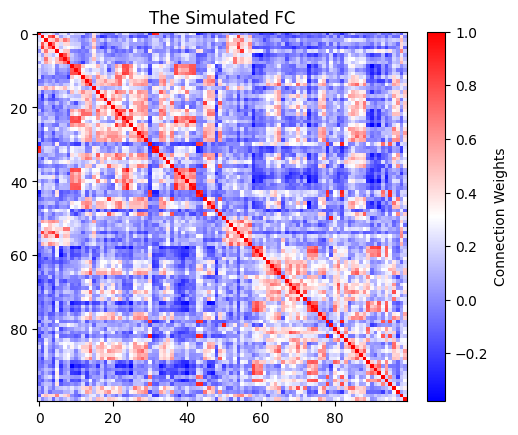

In [87]:
plt.imshow(fc_sim, cmap='bwr')
plt.title('The Simulated FC')
plt.colorbar(fraction=0.046, pad=0.04, label='Connection Weights')
plt.show()

In [55]:
def compute_fc_lower_triangle(fc, node_size=100):
    # Get the lower triangle
    mask_e = np.tril_indices(node_size, -1)
    lower_triangle = fc[mask_e]
    
    return lower_triangle

In [75]:
lower_triangle_fc = compute_fc_lower_triangle(fc_sim)
v = predictor.predict([lower_triangle_fc])

v[0]

0.027113944466532935

0
Group: CN
Group: MCI
Group: AD
1
Group: CN
Group: MCI
Group: AD
2
Group: CN
Group: MCI
Group: AD
3
Group: CN
Group: MCI
Group: AD
4
Group: CN
Group: MCI
Group: AD
5
Group: CN
Group: MCI
Group: AD
6
Group: CN
Group: MCI
Group: AD
7
Group: CN
Group: MCI
Group: AD
8
Group: CN
Group: MCI
Group: AD
9
Group: CN
Group: MCI
Group: AD
10
Group: CN
Group: MCI
Group: AD
11
Group: CN
Group: MCI
Group: AD
12
Group: CN
Group: MCI
Group: AD
13
Group: CN
Group: MCI
Group: AD
14
Group: CN
Group: MCI
Group: AD
15
Group: CN
Group: MCI
Group: AD
16
Group: CN
Group: MCI
Group: AD
17
Group: CN
Group: MCI
Group: AD
18
Group: CN
Group: MCI
Group: AD
19
Group: CN
Group: MCI
Group: AD
20
Group: CN
Group: MCI
Group: AD
21
Group: CN
Group: MCI
Group: AD
22
Group: CN
Group: MCI
Group: AD
23
Group: CN
Group: MCI
Group: AD
24
Group: CN
Group: MCI
Group: AD


/var/folders/kc/0zmcgk1j313586f5z7yvtgjh0000gn/T/ipykernel_69316/3462362970.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(ventricular_icv, labels=groups)


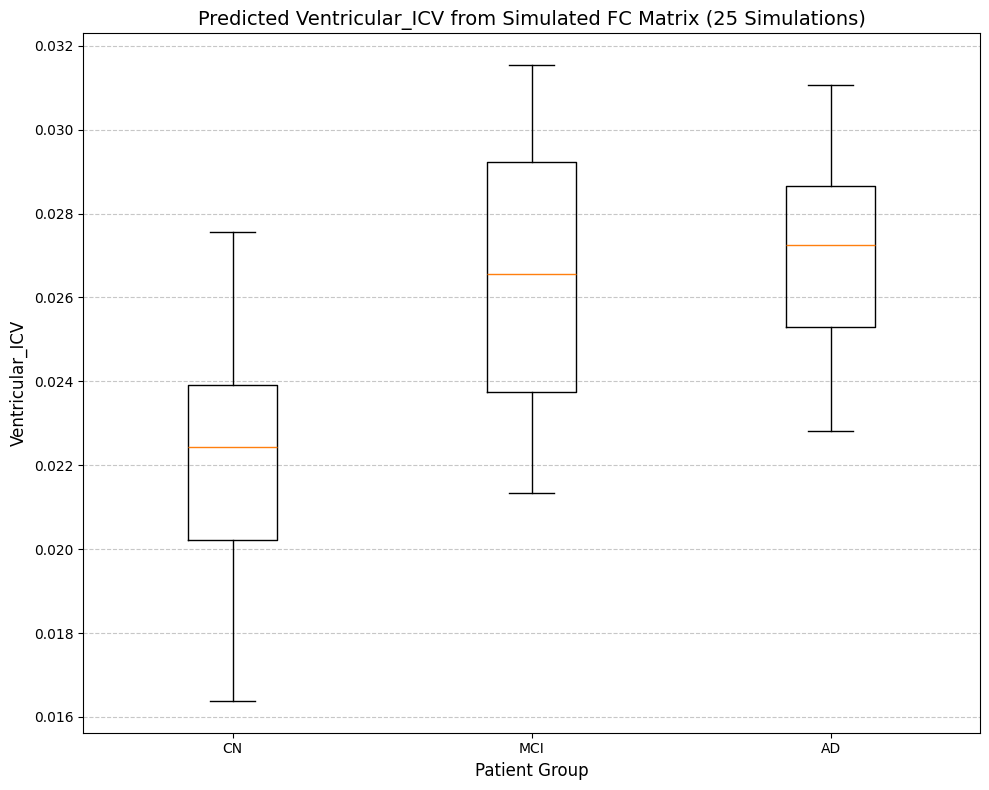

In [85]:
groups = ['CN', 'MCI', 'AD']
ventricular_icv = [[], [], []]

for i in range(25):
    print(i)
    for i in range(len(groups)):
        print(f'Group: {groups[i]}')
        model = whole_brain_models[i]

        _, fc = model.simulate(u =0, num_windows=num_windows, base_window_num=20)
        lower_triangle_fc = compute_fc_lower_triangle(fc)
        v = predictor.predict([lower_triangle_fc])
        ventricular_icv[i].append(v[0])

# colors = plt.cm.viridis(np.linspace(0, 1, len(groups)))

plt.figure(figsize=(10, 8))
plt.boxplot(ventricular_icv, labels=groups)
# plt.bar(groups, ventricular_icv, color=colors)

plt.title('Predicted Ventricular_ICV from Simulated FC Matrix (25 Simulations)', fontsize=14)
plt.xlabel('Patient Group', fontsize=12)
plt.ylabel('Ventricular_ICV', fontsize=12)


# plt.xticks(rotation=45, ha='right', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

## Visualise A-beta and Tau
Figure out how you can vary one of them 

In [94]:
abeta_cn = np.genfromtxt(f'../data/avg_scans/AB_CN.csv', delimiter=",")
abeta_mci = np.genfromtxt(f'../data/avg_scans/AB_MCI.csv', delimiter=",")
abeta_ad = np.genfromtxt(f'../data/avg_scans/AB_AD.csv', delimiter=",")

abeta_data = np.array([abeta_cn, abeta_mci, abeta_ad])
abeta_data.shape

(3, 100)

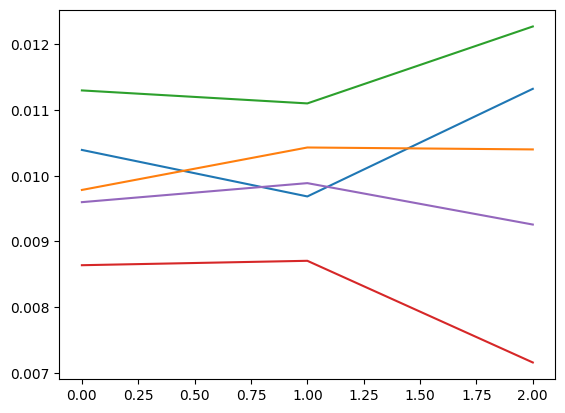

In [100]:
plt.plot(abeta_data[:, :5])

plt.title('Predicted Ventricular_ICV from Simulated FC Matrix (25 Simulations)', fontsize=14)
plt.xlabel('Patient Group', fontsize=12)
plt.ylabel('Ventricular_ICV', fontsize=12)

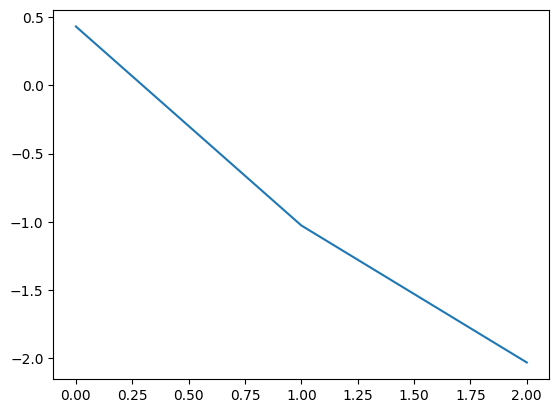

In [106]:
cn_factors =  {
    'bAB_E': 0.4320991563612215, 
    'sAB_E': 0.36044967919996074, 
    'bt_E': -0.6482380264178235, 
    'st_E': -2.7855677723437537, 
    'bAB_I': -0.5, 
    'sAB_I': -3
}

mci_factors = {
    'bAB_E': -1.026687315701573, 
    'sAB_E': 3.4427744183767133, 
    'bt_E': -0.1555155350316908, 
    'st_E': -1.2906392601169514, 
    'bAB_I': -3.2613885265888074, 
    'sAB_I': -2.6305870917421164,
}

ad_factors = {
    'bAB_E': -2.030912491228514, 
    'sAB_E': 1.8476816394493856, 
    'bt_E': -1.6265904292319298, 
    'st_E': -3.709296958744482, 
    'bAB_I': -4.85996679685065, 
    'sAB_I': -7.643931878279661
}

bAB_Es = [cn_factors['bAB_E'], mci_factors['bAB_E'], ad_factors['bAB_E']]

plt.plot(bAB_Es)